In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.model_selection import FeatureImportances

from sklearn import datasets
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, y = datasets.load_wine(return_X_y = True)

scaling = MinMaxScaler()
X = scaling.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.33, random_state = 66)

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
clf.score(X_test,y_test)

0.9491525423728814

In [5]:
clf = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 1.0)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.5423728813559322

[Text(223.2, 224.235, 'X[11] <= 0.337\ngini = 0.662\nsamples = 119\nvalue = [36, 46, 37]'),
 Text(111.6, 74.745, 'gini = 0.245\nsamples = 42\nvalue = [0, 6, 36]'),
 Text(334.79999999999995, 74.745, 'gini = 0.511\nsamples = 77\nvalue = [36, 40, 1]')]

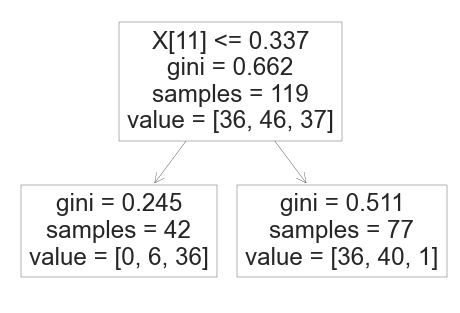

In [6]:
tree.plot_tree(clf)

### Observation
* Max depth of the tree reaches till 5, after that even if max_depth > 5, splitting does not occur
* Max depth 1 gives the lowest score (0.54), max depth 2 improves it to (0.91)
* Max depth 3 gives the best score (0.98) and it remains the same for larger values of max_depth
* Lower values of min_samples_leaf in float (0.0 to 0.5) keeps the score as best as max_depth = 3
* Higher values of min_samples_leaf in float gradually decrease the score but give more granuality to control the degradation

### Selecting max_depth = 3 as best pruning strategy

In [13]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.33, random_state = 42)

clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9491525423728814

[Text(223.2, 261.6075, 'X[9] <= 0.217\ngini = 0.66\nsamples = 119\nvalue = [39, 47, 33]'),
 Text(133.92000000000002, 186.8625, 'X[2] <= 0.914\ngini = 0.089\nsamples = 43\nvalue = [2, 41, 0]'),
 Text(89.28, 112.1175, 'X[11] <= 0.934\ngini = 0.046\nsamples = 42\nvalue = [1, 41, 0]'),
 Text(44.64, 37.3725, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(133.92000000000002, 37.3725, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(178.56, 112.1175, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(312.48, 186.8625, 'X[6] <= 0.224\ngini = 0.568\nsamples = 76\nvalue = [37, 6, 33]'),
 Text(267.84000000000003, 112.1175, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]'),
 Text(357.12, 112.1175, 'X[12] <= 0.318\ngini = 0.24\nsamples = 43\nvalue = [37, 6, 0]'),
 Text(312.48, 37.3725, 'gini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(401.76, 37.3725, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]')]

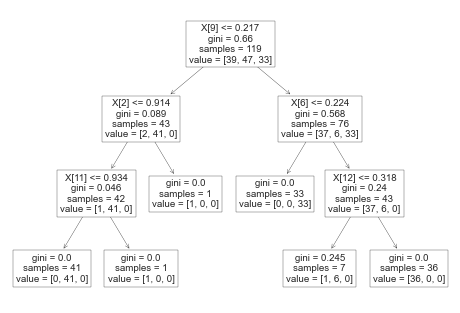

In [14]:
tree.plot_tree(clf)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


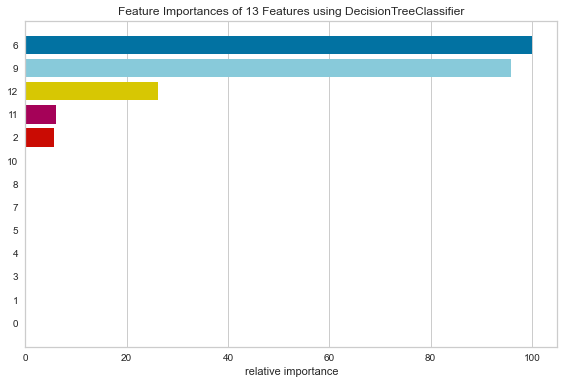

In [15]:
viz = FeatureImportances(clf)
viz.fit(X, y)
viz.show()